## WCS - CB4_64_16D_STK_1

This example presents a way to access the data stored in the ODC of the BDC. In this example, the CBERS-4 (CB4_64_16D_STK_1) collection is loaded.

> To find out about all the available collections, consult the [BDC-STAC](http://brazildatacube.dpi.inpe.br/stac/).

In [1]:
import io
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.io import MemoryFile
from owslib.wcs import WebCoverageService

from rasterio.plot import show

The first step in using the WCS is to connect to the service. To do this, use the command below.

> Note that there may be changes in the address of the service.


In [2]:
odcwcs = WebCoverageService('http://brazildatacube.dpi.inpe.br/odc/ows/wcs', version = '1.0.0')

After connecting to the WCS service, let's recover a coverage

> The CRS used in the BDC is also defined to perform the requisition, this avoids errors in the return of the ODC-OWS service

In [3]:
bdc_crs = '+proj=aea +lat_0=-12 +lon_0=-54 +lat_1=-2 +lat_2=-22 +x_0=5000000 +y_0=10000000 +ellps=GRS80 +units=m +no_defs'

In [4]:
usgscov = odcwcs.getCoverage('CB4_64_16D_STK_1', format = 'GeoTIFF', bbox = [5675494.6363868695, 
                                                                          10079063.34684516, 
                                                                          5911338.069387823, 
                                                                          10321145.148617249], 
                                                                          crs = bdc_crs, 
                                                                          width = 1000, 
                                                                          height = 1000)

Once this is done, let's load the result with the raster.io and visualize each of the bands.

In [5]:
data = usgscov.read()

with MemoryFile(data) as memfile:
    with memfile.open() as dataset:
        data_array = dataset.read()

**Viewing the bands delivered by default in WCS (RGB) separately**

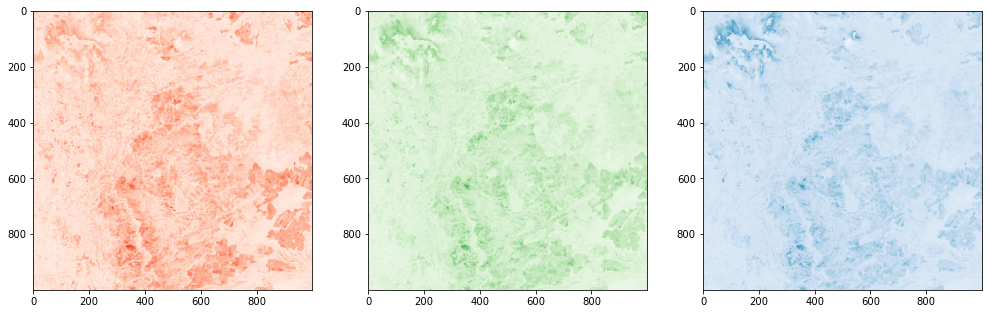

In [6]:
fig, ax = plt.subplots(figsize = (17, 17), ncols = 3, nrows = 1)

show(data_array[0, :, :], cmap = 'Reds', ax = ax[0])
show(data_array[1, :, :], cmap = 'Greens', ax = ax[1])
show(data_array[2, :, :], cmap = 'Blues', ax = ax[2])

**Viewing the bands delivered by default in WCS (RGB) together**

In [7]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0
    See: https://brazil-data-cube.github.io/worcap-2020/access-view/plot.html
    """
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

See!

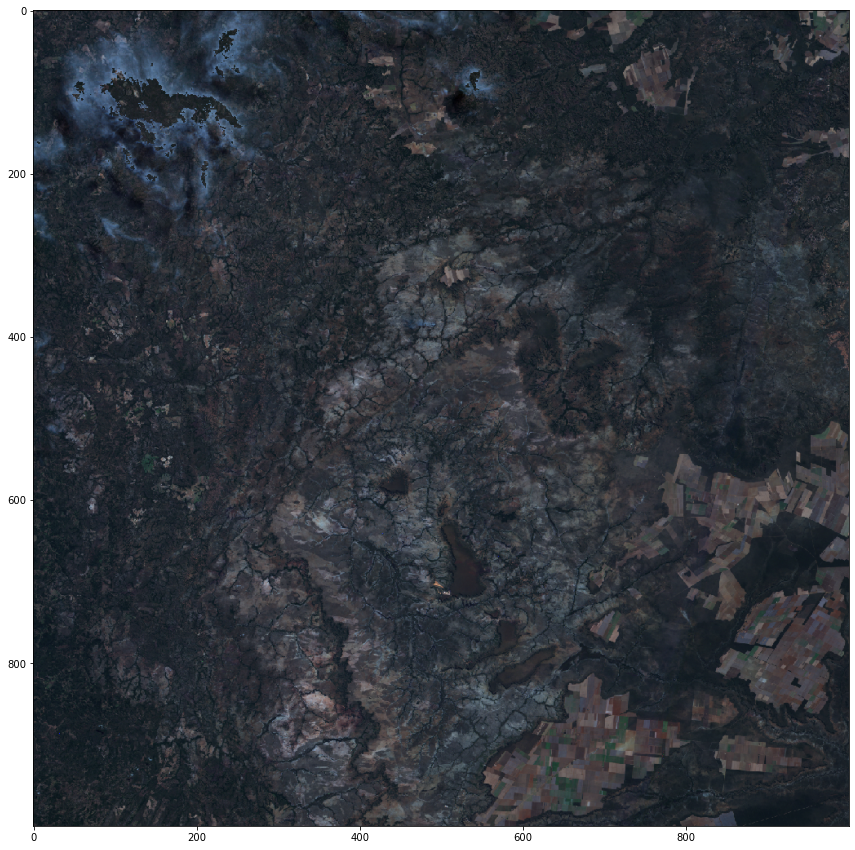

In [8]:
rgb = np.dstack((normalize(data_array[0, :, :]), normalize(data_array[1, :, :]), normalize(data_array[2, :, :])))

plt.figure(figsize = (15, 15))
plt.imshow(rgb)